# Unsupervised Machine Learning ( K-Means Clustering)

In [16]:
# first we do the nessecery imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics 
# the iris dataset is provided by sklearn
from sklearn import datasets

### Data loading and inspection

In [17]:
iris = datasets.load_iris(as_frame = True)
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["iris_type"] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# mapping of the labels
# making a deepcopy to avoid using same ref
iris_mapped = iris_df.copy(deep=True)
iris_mapped.iris_type=iris_mapped.iris_type.map({0:"Iris-setosa", 1:"Iris-versicolour",2:"Iris-virginica"})
iris_mapped.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
iris_df.isna().any()
# upon inspection no need to do feautre scalling or any cleaning

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
iris_type            False
dtype: bool

### FInding the optimume number of clusters for the K-means algorithm

C:\Users\bedox\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


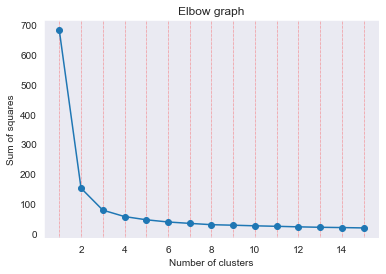

In [21]:
# to find the best number of cluster we use the elbow method to see the different within cluster sum of squears

# first is data preperation 
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

sum_of_sqrd_dist = []
for k in range(1,16):
    km = KMeans(n_clusters = k)
    km.fit(X)
    sum_of_sqrd_dist.append(km.inertia_)
    plt.axvline(x=k, color='red', linestyle='dotted', linewidth=0.5)

plt.plot(range(1,16), sum_of_sqrd_dist,  marker='o');
plt.title("Elbow graph")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares")
plt.grid()
plt.show()

#### It can be seen that the sum of squares or the variability almost stop reducing byond 3 clusters so optimum clusters will be 3 (THE ELBOW)

### Applying K-means

In [51]:
km = KMeans(n_clusters = 3 ,init = 'k-means++',
                max_iter = 300, random_state=2).fit(X)
#random state 2 achieved good results
y_km = km.predict(X)

In [52]:
# adding and mapping the predicions to the dataframe
iris_mapped["pred_clust"] = y_km
# we map the classes to the actual names so that the final scatter plot look meaningful 
iris_mapped.pred_clust=iris_mapped.pred_clust.map({0:"Iris-setosa", 1:"Iris-versicolour",2:"Iris-virginica"})
iris_mapped.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type,pred_clust
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


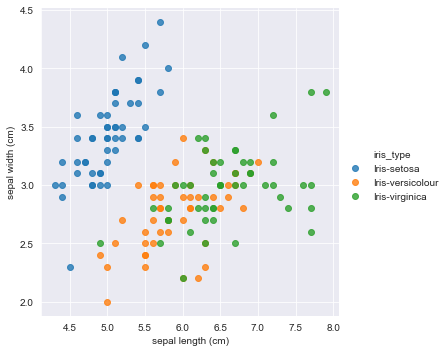

In [56]:
#plotting the data using the first two columns (THE LABELING IS THAT OF THE ACTUAL DATA)
import seaborn as sns
sns.set_style("darkgrid")
sns.lmplot(data=iris_mapped, x="sepal length (cm)", y="sepal width (cm)",
           fit_reg=False, # No regression line
           hue='iris_type')  

plt.show()

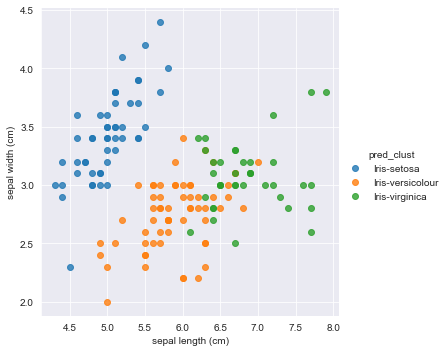

In [57]:
#plotting the data using the first two columns (THE LABELING IS THE PREDICTION)
sns.lmplot(data=iris_mapped, x="sepal length (cm)", y="sepal width (cm)",
           fit_reg=False, # No regression line
           hue='pred_clust')  

plt.show()

In [63]:
# model evaluation
score = metrics.accuracy_score(y,km.predict(X)) * 100
print("The accuracy is {:.2f} %".format(score))

The accuracy is 89.33 %
